In [2]:
import math
import tensorflow as tf
import numpy as np
import pylab as plt

/Users/lzcai/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [4]:
# Initialize Values
NUM_FEATURES = 36
NUM_CLASSES = 6
NUM_HIDDEN = 10

learning_rate = 0.01
epochs = 1000
batch_size = 32
num_neurons = 10
seed = 10
beta = pow(10, -6)
np.random.seed(seed)

train_file_name = 'sat_train.txt'
test_file_name = 'sat_test.txt'

In [5]:
def process_inputs_from_file(fileName): # Read in data
    inputs = np.loadtxt(fileName, delimiter=' ')
    X, _Y = inputs[:, :NUM_FEATURES], inputs[:, -1].astype(int)
    X = scale(X, np.min(X, axis=0), np.max(X, axis=0))
    _Y[_Y == 7] = 6 # Actually dont have, just in case have error data

    Y = np.zeros((_Y.shape[0], NUM_CLASSES))
    Y[np.arange(_Y.shape[0]), _Y - 1] = 1 #one hot matrix
    return X, Y

In [6]:
trainX, trainY = process_inputs_from_file(train_file_name)
testX, textY = process_inputs_from_file(test_file_name)

In [8]:
trainX[0,:36]

array([0.8125    , 0.8       , 0.76190476, 0.50413223, 0.70967742,
       0.68181818, 0.58947368, 0.390625  , 0.6875    , 0.72815534,
       0.54736842, 0.421875  , 0.98387097, 0.95192308, 0.86956522,
       0.59322034, 0.8125    , 0.82524272, 0.74698795, 0.41463415,
       0.69230769, 0.73786408, 0.6       , 0.416     , 0.96875   ,
       0.95192308, 0.93103448, 0.58333333, 0.75384615, 0.93069307,
       0.82105263, 0.5546875 , 0.6875    , 0.77669903, 0.66315789,
       0.453125  ])

In [10]:
trainY[0]

array([0., 0., 1., 0., 0., 0.])

In [11]:
def init_weights (feature_no, neuron_no, logistic = True):
    # From eg.5.2
    n_in = feature_no
    n_out = neuron_no
    W_values = np.asarray(np.random.uniform(low=-np.sqrt(6. / (n_in + n_out)),
                                            high=np.sqrt(6. / (n_in + n_out)),
                                            size=(n_in, n_out)))
    if logistic == True:
        W_values *= 4
    return(tf.Variable(W_values, dtype=tf.float32))

In [12]:
def init_bias(neuron_no = 1):
    # From eg.5.2
    return(tf.Variable(np.zeros(neuron_no), dtype=tf.float32))

In [13]:
V = init_weights(NUM_HIDDEN, NUM_CLASSES)
c = init_bias(NUM_CLASSES)
W = init_weights(NUM_FEATURES, NUM_HIDDEN)
b = init_bias(NUM_HIDDEN)

In [14]:
x = tf.placeholder(tf.float32, trainX.shape)
d = tf.placeholder(tf.float32, trainY.shape)

z = tf.matmul(x, W) + b
h = tf.nn.sigmoid(z)
y = tf.matmul(h, V) + c

In [17]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=trainY, 
    logits=y)
regularization = tf.nn.l2_loss(V) + tf.nn.l2_loss(W) 
J = tf.reduce_mean(cross_entropy + beta * regularization)

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(J)

In [19]:
correct_prediction = tf.cast(tf.equal(tf.argmax(y, 1), 
                                      tf.argmax(trainY, 1)), tf.float32)
accuracy = tf.reduce_mean(correct_prediction)

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_acc = []
    for i in range(epochs):
        train_op.run(feed_dict={x: trainX, y_: trainY})
        train_acc.append(accuracy.eval(feed_dict={x: trainX, y_: trainY}))

        if i % 100 == 0:
            print('iter %d: accuracy %g'%(i, train_acc[i]))

NameError: name 'y_' is not defined

In [52]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
W_, b_ = sess.run([W, b])
print('W: {}, b: {}'.format(W_, b_))
V_, c_ = sess.run([V, c])
print('V:{}, c:{}'.format(V_, c_))

W: [[-1.598055  ]
 [ 0.03927797]
 [ 1.0071237 ]
 [ 0.36250824]
 [ 0.71439564]
 [-0.67048144]
 [ 1.3458798 ]
 [ 0.6912664 ]
 [ 0.13705876]
 [-1.1527667 ]
 [-0.40803894]
 [ 0.56097996]
 [-0.18738729]
 [-0.21257716]
 [ 0.3793921 ]
 [ 0.04232549]
 [ 0.4845119 ]
 [ 0.32550195]
 [ 0.9832915 ]
 [ 0.06973736]
 [ 1.3164824 ]
 [-0.5823398 ]
 [-1.3193552 ]
 [-0.64205456]
 [-1.2435683 ]
 [ 1.058863  ]
 [-1.4596957 ]
 [ 0.40684023]
 [ 0.15330113]
 [ 1.0285987 ]
 [-0.96985525]
 [ 1.1496108 ]
 [-0.4779083 ]
 [ 0.82036   ]
 [-0.65731937]
 [ 1.2368702 ]], b: [0.]
V:[[-2.2363157  1.9296366 -2.4507506 -3.0489862  1.3728788  3.3580854]], c:[0. 0. 0. 0. 0. 0.]


In [57]:
err = []
for i in range(epochs):
    sess.run([W_new, b_new, V_new, c_new], {x:trainX, d:trainY})
    cost_ = sess.run(J, {x:trainX, d:trainY})
    err.append(cost_)


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,36]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,36], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: Variable_2/read/_31 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_9_Variable_2/read", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder', defined at:
  File "C:\Users\lzcai\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\lzcai\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\lzcai\Anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\lzcai\Anaconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\lzcai\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-cb8595337228>", line 2, in <module>
    x = tf.placeholder(tf.float32, [None, NUM_FEATURES])
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1735, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5928, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,36]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,36], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: Variable_2/read/_31 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_9_Variable_2/read", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [7]:
# Build the graph for the deep net

weights = tf.Variable(tf.truncated_normal([NUM_FEATURES, NUM_CLASSES],
                                          stddev=1.0/math.sqrt(float(NUM_FEATURES))),
                      name='weights')
biases  = tf.Variable(tf.zeros([NUM_CLASSES]), name='biases')
logits  = tf.matmul(x, weights) + biases

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=logits)
loss = tf.reduce_mean(cross_entropy)

In [8]:
# Create the gradient descent optimizer with the given learning rate.
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

correct_prediction = tf.cast(tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1)), tf.float32)
accuracy = tf.reduce_mean(correct_prediction)

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_acc = []
    for i in range(epochs):
        train_op.run(feed_dict={x: trainX, y_: trainY})
        train_acc.append(accuracy.eval(feed_dict={x: trainX, y_: trainY}))

        if i % 100 == 0:
            print('iter %d: accuracy %g'%(i, train_acc[i]))

NameError: name 'y_' is not defined

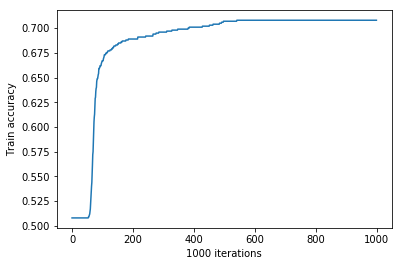

In [10]:
# plot learning curves
plt.figure(1)
plt.plot(range(epochs), train_acc)
plt.xlabel(str(epochs) + ' iterations')
plt.ylabel('Train accuracy')
plt.show()